<div style="text-align: center;">
    <h1><strong>Physics 129L: Problem Set 4</strong></h1>
</div>

<div style="text-align: center;">
    <h3><strong>Problem Set Submission Guideline</strong></h3>
</div>

**A) Github Submissions**
We will use GitHub for problem set submissions. To access the problem set, please **fork** and **clone** the **forked** repository to your local virtual machine. **Please complete the problem set in this forked directory.** Submit **a pull request** for merging into the main branch before the problem set due date.

**B) .tar.gz File compression and submission on Github**
For each problem set, you are asked to submit the compressed version of the problem set to GitHub via git operation. Here is a step-by-step guideline:

1. Use the **tar** command to compress the problem set directory into a **single** ".tar.gz" file.
2. Obtain the sha256sum by running "sha256sum P2.tar.gz".
3. Echo the **full sha256sum** to a text file named "sha25sum_problem_set.txt".
4. Initialize a git repository named "Archive_P# (#: problem set number) on your local machine, and move both the "tar.gz" file and the "sha25sum_problem_set.txt" file to the repository.
5. Create an empty **public** directory under the **same name** in **your own GitHub account**.
6. **Push** this local repository to the remote repository.

<div style="text-align: center;">
    <h2><strong>Problem 1: Statistical Inference on Biased Coins</strong></h2>
</div>


Let's consider a problem similar to the one we discussed in class. You are given three datasets, each containing 500 coin-flip outcomes represented as **Boolean** values (True means Head, and False means Tail). In this problem, your task is to investigate potential biases in the coin flips within these datasets. To load the dataset, please use the following code: 

In [1]:
import json 
# Define the file path for the JSON file
json_file_path = 'problem_1/dataset_1.json'

# Read the boolean data from the JSON file into a Python list
with open(json_file_path, 'r') as json_file:
    boolean_list_out = json.load(json_file)

<div style="text-align: center;">
    <h3><strong> Bayesian Inference </strong></h3>
</div>
<br>
As discussed in class, for a given $p$, the probability that $N=500$ tosses result in $M$ heads and $N-M$ tails is given by the binomial distribution, with the probability mass function, namely the likelyhood function:
<br>
$$ P(M,N|p) = \binom{N}{M} p^{M} (1-p)^{N-M}. $$
<br>
Then the corresponding posterior is given by the Bayes' theorem,
$$ P(p|M,N) \sim \frac{1}{B(M,N)} P(M,N|p)P(p), $$
where,
<br>
$$ B(M,N) = \int_0^1 dp\ p^{M} (1-p)^{N-M} = \frac{\Gamma(M+1)\Gamma(N-M+1)}{\Gamma(N+2)} .$$
<br>
Note that the above integral defines the Beta function, expressed in terms of the Gamma function (factorial, $\Gamma(n+1) = n!$). For more details, please check out https://en.wikipedia.org/wiki/Beta_function). <br>
<br>


## A) 
First, we assume that our initial model for $p$ is a uniform distribution (prior), i.e., $P(p) \sim 1/N$.
<br>

With this prior distribution, apply the Bayesian inference methods discussed in class to calculate the likelihood functions for three datasets named 'problem_1/dataset_1.json,' 'problem_1/dataset_2.json,' and 'problem_1/dataset_3.json.' Subsequently, create a (3,1) plot to visualize the corresponding posterior distributions for each dataset. Additionally, numerically calculate the expectation value and variance of each posterior distribution. (hint: look at the stats.ipynb I provided on Canvas)



Processing file problem_1/dataset_1.json
	Read 500 samples
	Found 196 heads and 304 tails.
	Computed posterior mean: 3.9243e-01 and variance: 4.7401e-04.
	Computed expectation value: 7.8400e-04.
	Finished with file problem_1/dataset_1.json

Processing file problem_1/dataset_2.json
	Read 500 samples
	Found 203 heads and 297 tails.
	Computed posterior mean: 4.0637e-01 and variance: 4.7959e-04.
	Computed expectation value: 8.1200e-04.
	Finished with file problem_1/dataset_2.json

Processing file problem_1/dataset_3.json
	Read 500 samples
	Found 142 heads and 358 tails.
	Computed posterior mean: 2.8486e-01 and variance: 4.0500e-04.
	Computed expectation value: 5.6800e-04.
	Finished with file problem_1/dataset_3.json



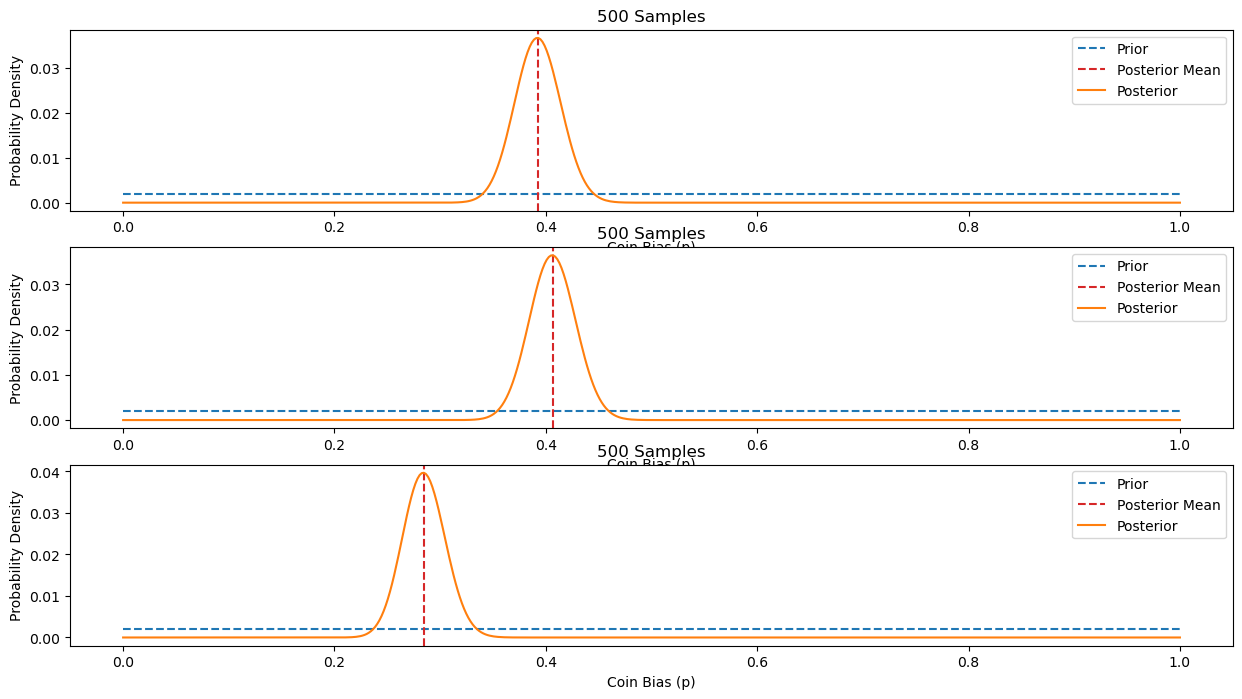

'--------------------Write your code above this line------------------------------'

In [2]:
import numpy as np
import matplotlib.pyplot as plt

'''--------------------Write your code below this line------------------------------'''
from scipy.stats import beta
from scipy.special import comb
from scipy.stats import binom

# Loop across all 3 files for efficiency:
my_data_files = [
    'problem_1/dataset_1.json',
    'problem_1/dataset_2.json',
    'problem_1/dataset_3.json',
]


# Set up the basis of the future figure:
n_rows = len(my_data_files)
n_cols = 1
row    = 0

fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 8))

for json_file_path in my_data_files:

    print(f"Processing file {json_file_path}")
    
    # Read boolean JSON file into Python list
    with open(json_file_path, 'r') as json_file:
        boolean_list_out = json.load(json_file)

    # Count the number of samples
    N = len(boolean_list_out)  
    print(f"\tRead {N} samples")

    
    # Set up prior distribution. We want each starting prior probability to be 1/N
    prior = np.ones(N)
    # Get the initial uniform prior
    prior/= N
    bias_values = np.linspace(0, 1, N)

    # Hold onto this value:
    prior_0 = prior

    posterior_mean_arry     = [np.sum(bias_values * prior_0) / np.sum(prior_0)]
    posterior_variance_arry = [0.0]

    # How many heads? (heads=True)
    observed_heads = sum(1 for v in boolean_list_out if v == True)
    # The rest must be tails:
    observed_tails = N - observed_heads

    print(f"\tFound {observed_heads} heads and {observed_tails} tails.")

    # Calculate likelihood function (probability of observing data given bias)
    likelihood = binom.pmf(observed_heads, N, bias_values) # comb(n, observed_heads) *(bias_values ** observed_heads) * ((1 - bias_values) ** observed_tails)

    # Update posterior distribution by multiplying prior and likelihood
    posterior  = prior * likelihood
    posterior /= np.sum(posterior)  # Normalize to make it a proper probability distribution

    posterior_mean     = np.sum(bias_values * posterior) / np.sum(posterior)
    posterior_variance = (np.sum(posterior*(bias_values-posterior_mean)**2))/( np.sum(posterior))

    print(f"\tComputed posterior mean: {posterior_mean:0.4e} and variance: {posterior_variance:0.4e}.")

    expectation_value  = np.sum(boolean_list_out * prior)/N
    print(f"\tComputed expectation value: {expectation_value:0.4e}.")
    
    posterior_mean_arry.append(posterior_mean)
    posterior_variance_arry.append(posterior_variance)

    # Plot prior and posterior distributions
    axs[row].plot(bias_values, prior, label='Prior', color='tab:blue', linestyle='--')
    axs[row].axvline(x=posterior_mean, color='tab:red', linestyle='--', label='Posterior Mean')

    axs[row].plot(bias_values, posterior, color='tab:orange', label='Posterior')
    axs[row].set_title(f'{N} Samples')
    axs[row].set_xlabel('Coin Bias (p)')
    axs[row].set_ylabel('Probability Density')
    axs[row].legend()

    row += 1
    
    print(f"\tFinished with file {json_file_path}\n")

plt.show()

'''--------------------Write your code above this line------------------------------'''

<div style="text-align: center;">
    <h3><strong> Frequentist Inference: Stirling’s approximation </strong></h3>
</div>
<br>
As we discussed in class, the frequentist inference assumes a fixed $p_{\rm true}$. Maximum Likelihood Estimation (MLE) is a technique used to estimate the parameter $p_{\rm true}$ of a presumed probability distribution (in this case, binomial) based on observed data. It involves maximizing a likelihood function,
<br>
$$ P(M,N|p) = \binom{N}{M} p^{M} (1-p)^{N-M}. $$
<br>
with the objective of making the observed data most likely under the assumed model. In practice, working with the natural logarithm of the likelihood function $P(M,N|p)$, known as the log-likelihood, is often more convenient,
$$\mathcal{P}(M,N|p)=\log [P(M,N|p)]=  \log[\binom{N}{M}]+ M \log(p)+({N-M}) \log(1-p).$$
When $N$ is large, we can approximate the factorial by the Stirling’s approximation,
<br>
$$\log(n!) \approx n\log(n) - n + \frac{1}{2}\log(2\pi n).$$
<br>


## B) 
Numerically check the Stirling’s approximation by compute both sides of the above equation and make a (2,1) plot that shows the following: 1) for factorial, vary N from 1 to 10 and calculate each value then make a scatter plot. Plot a **smooth curve** that shows the Stirling’s formula (remember, the Stirling’s formula takes real values) and the Gamma function $\Gamma(N+1)$. 2) plot the difference between the Stirling’s formula and the Gamma function. Please label your plot. 

Stirling output:


array([-0.08106147,  0.65180648,  1.76408154,  3.15726316,  4.77084705,
        6.56537508,  8.51326465, 10.59419164, 12.79257202])



Stirling output:


array([1.0000e+00, 2.0000e+00, 6.0000e+00, 2.4000e+01, 1.2000e+02,
       7.2000e+02, 5.0400e+03, 4.0320e+04, 3.6288e+05])

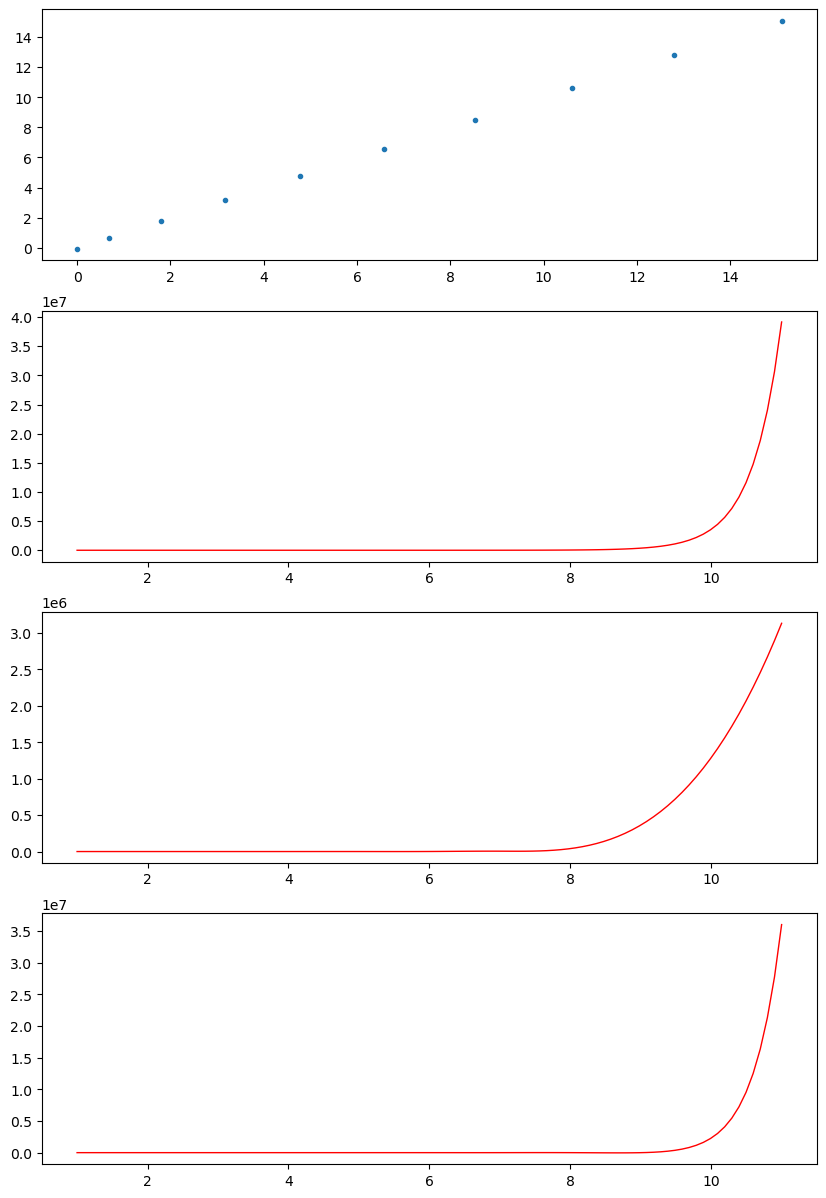

'--------------------Write your code above this line------------------------------'

In [3]:

'''--------------------Write your code below this line------------------------------'''
import math
from scipy import special
from scipy import interpolate

lhs = [0]*10
rhs = [0]*10
for n in range(1, 11):
    fact     = math.factorial(n)
    log_fact = math.log(fact)
    lhs[n-1] = log_fact
    
    log_n    = math.log(n)
    log_2pin = math.log(2 * math.pi * n)
    rhs[n-1]   = n * log_n - n + (1/2.0)*log_2pin

nlist    = np.array([range(1,10)])
stirling = nlist * np.log(nlist) - nlist + (1/2.0)*np.log(2.0 * np.pi * nlist)
gnlist   = nlist + 1.0
gammas   = special.gamma(gnlist)
print("Stirling output:")
display(stirling[0])
print("\n")
print("Stirling output:")
display(gammas[0])

stirling_spline = interpolate.make_interp_spline(nlist[0], stirling[0])
 
# Find a smooth set of Stirling results and Gamma results and compare.

x_stirling     = np.linspace(1, 11, 100)
y_stirling     = stirling_spline(x_stirling)
y_stirling_exp = np.exp(y_stirling)

gamma_spline   = interpolate.make_interp_spline(nlist[0], gammas[0])
x_gammas       = np.linspace(1, 11, 100)
y_gammas       = gamma_spline(x_gammas)

diffs          = y_stirling_exp - y_gammas


fig, axs = plt.subplots(4, 1, figsize=(10, 15))
axs[0].scatter(lhs, rhs, marker=".")
axs[1].plot(x_stirling, y_stirling_exp, linewidth="1", linestyle="-", color="r")
axs[2].plot(x_gammas, y_gammas, linewidth="1", linestyle="-", color="r")
axs[3].plot(x_gammas, diffs, linewidth="1", linestyle="-", color="r")
plt.show()

'''--------------------Write your code above this line------------------------------'''

<div style="text-align: center;">
    <h3><strong> Frequentist Inference: Maximum Likelihood Estimation </strong></h3>
</div>
<br>
Maximum Likelihood Estimation is given by the condition,
$$\frac{ \partial  }{ \partial  p} \mathcal{P}(M,N|p)=0.$$


## C)
Calculate the above condition **analytically**,
<br> 
''**write you answer below**''
<br><br> **Steps:** <br>
$$\frac{\delta}{\delta p}[\ln{\binom{N}{M}} + M\ln p + (N - M)\ln(1 - p)] = 0$$
$$= \frac{M}{p} + \frac{N - M}{1 - p}(-1)$$
$$= \frac{M}{p} + \frac{M - N}{1 - p}$$
$$= \frac{M(1 - p) + (M - N)p}{p(1 - p)}$$
$$= \frac{M - Mp + Mp - Np}{p - p^2}$$
$$= \frac{M - Np}{p - p^2}$$
<p>Now, set that equal to 0 and solve...</p>
$$\frac{M - Np}{p - p^2} = 0$$
$$p = \frac{M}{N}$$

<br>
'' **write you answer above**''
<br> <br> 
What is the $p_{\rm max}$ for the above three datasets? 
''**write you answer below**''
<p>In this case, M = #heads and N = number of trials/tosses/the length of the data set.</p>
<br>**Data set 1:** 500 samples = N, 196 heads = $M_1$, MLE = $pmax = \frac{M_1}{N} = \frac{196}{500} = 0.392$

<br>**Data set 2:** 500 samples = N, 203 heads = $M_2$, MLE = $pmax = \frac{M_2}{N} = \frac{203}{500} = 0.406$

<br>**Data set 3:** 500 samples = N, 142 heads = $M_3$, MLE = $pmax = \frac{M_3}{N} = \frac{142}{500} = 0.284$
<br>
'' **write you answer above**''

## D) 
Using the method discussed in the class to find the maximum likelyhood function **numerically** for all three datasets. Plot three maximum likelyhood functions in three different subplots, and also plot the $p_{\rm max}$ above. (hint: look at the stats.ipynb). What do you find?

For row 0: 196 heads, 304 tails, MLE 0.3927855711422845, prod 196.39278557114227
For row 1: 203 heads, 297 tails, MLE 0.406813627254509, prod 203.40681362725448
For row 2: 142 heads, 358 tails, MLE 0.28456913827655306, prod 142.28456913827654



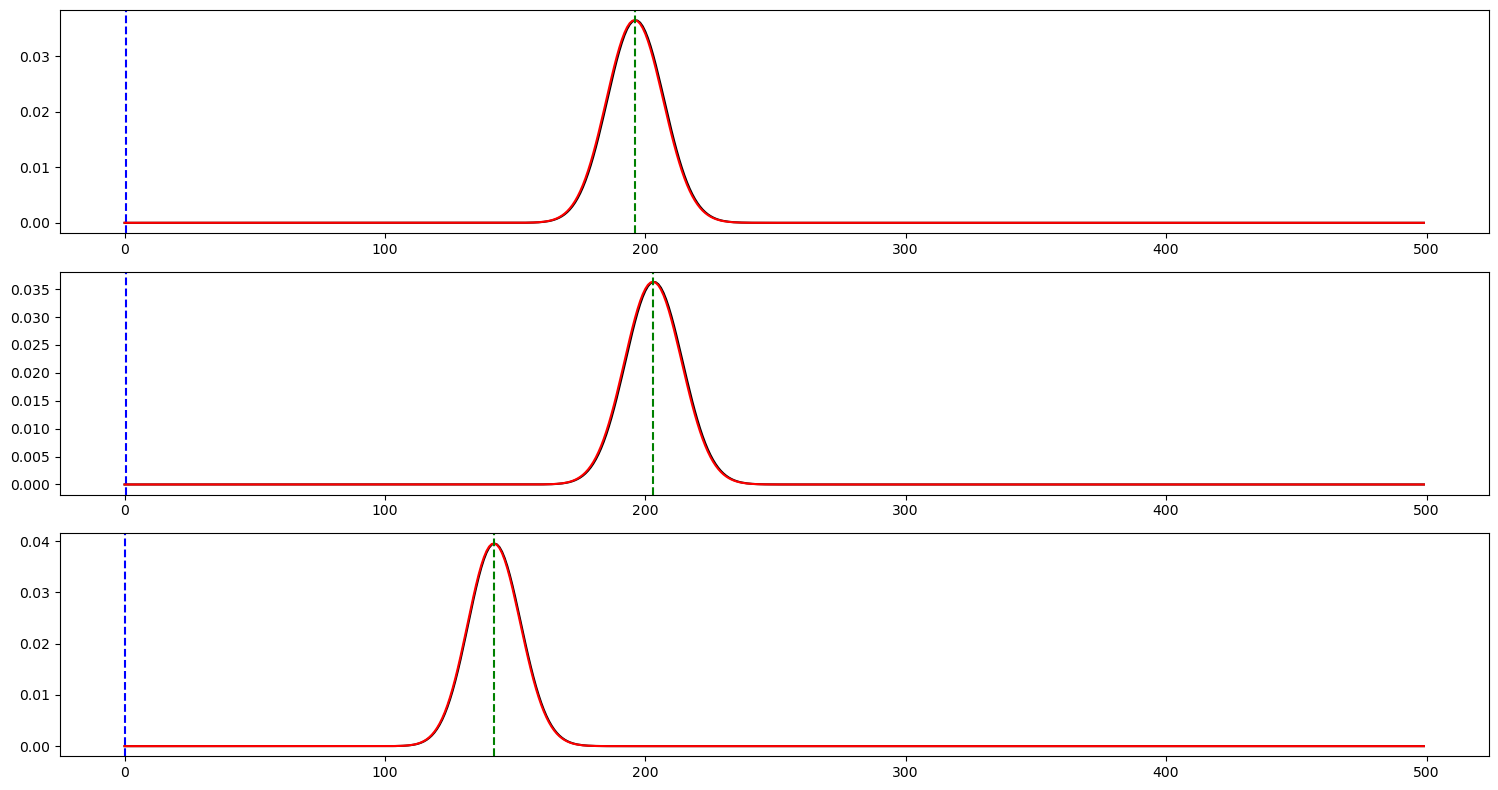

'--------------------Write your code above this line------------------------------'

In [4]:
'''--------------------Write your code below this line------------------------------'''
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 8))

for row in range(n_rows):
    # Read the files into Python lists as done before:
    json_file_path = my_data_files[row]
    with open(json_file_path, 'r') as json_file:
        boolean_list_out = json.load(json_file)
        
    N = len(boolean_list_out)
    
    # How many heads? (Heads = True)
    observed_heads = sum(1 for v in boolean_list_out if v == True)
    observed_tails = N - observed_heads
    
    bias_values = np.linspace(0, 1, N)
    
    # Calculate likelihood function
    likelihood = binom.pmf(observed_heads, N, bias_values)
    
    # Find the MLE for the bias:
    mle_estimate = bias_values[np.argmax(likelihood)]
    center_val = observed_heads / N
    number_heads_array = np.arange(N)
    max_likelihood_funct = binom.pmf(number_heads_array, N, mle_estimate)
    true_likelihood_funct = binom.pmf(number_heads_array, N, center_val)
    
    print(f'For row {row}: {observed_heads} heads, {observed_tails} tails, MLE {mle_estimate}, prod {mle_estimate*N}')
    
    axs[row].plot(number_heads_array, max_likelihood_funct, label="Max Likelihood", linestyle="-", color="black")
    axs[row].axvline(mle_estimate, linestyle="--", label="Observed Value", color="blue")
    axs[row].plot(number_heads_array, true_likelihood_funct, label="True Likelihood", linestyle="-", color="red")
    axs[row].axvline(x=observed_heads, linestyle="--", label="Observed Value", color="green")
    
print()
plt.tight_layout()
plt.show()
'''--------------------Write your code above this line------------------------------'''

<p>There <b>are</b> two curves overplotted here, but they're close enough in general to be hardly distinguishable even when the Max is black and the True is red! This means that the Max Likelihood and the True Likelihood are very close together for these data sets.</p>

<div style="text-align: center;">
    <h3><strong>  Bootstrapping </strong></h3>
</div>
<br>
Bootstrapping belongs to the wider category of resampling methods and involves any test or metric that employs random sampling with replacement, effectively replicating the sampling process (https://en.wikipedia.org/wiki/Bootstrapping_(statistics)),

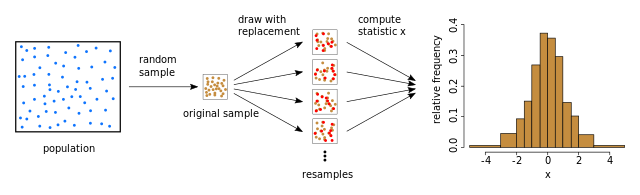
<br>
This process involves a substantial number of iterations, and for each of these bootstrap samples, we compute its expectation value or other statistical properties. The distribution of these expectation values or other statistical properties then provides insights into the characteristics of the underlying distribution. 

## E) 
Bootstrap three datasets 100 times each with sample sizes of 5, 15, 40, 60, 90, 150, 210, 300, and 400, and create a (3,3) histogram (so there will be a total of three (3,3) histograms). Calculate the expectation value and variance for each and label the subplot title with the sample size. 



Reading file problem_1/dataset_1.json
	Read 500 samples
Reading file problem_1/dataset_2.json
	Read 500 samples
Reading file problem_1/dataset_3.json
	Read 500 samples
Final data collection shape: (3,)

Processing file problem_1/dataset_1.json:
	100 repititions of 9 subsamples complete.
Processing file problem_1/dataset_2.json:
	100 repititions of 9 subsamples complete.
Processing file problem_1/dataset_3.json:
	100 repititions of 9 subsamples complete.





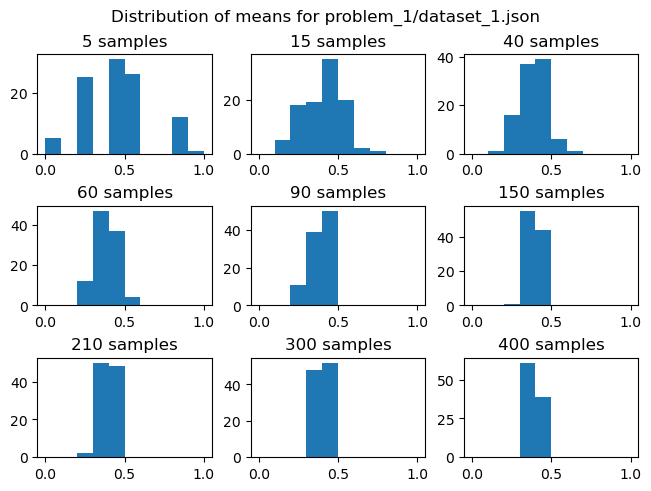

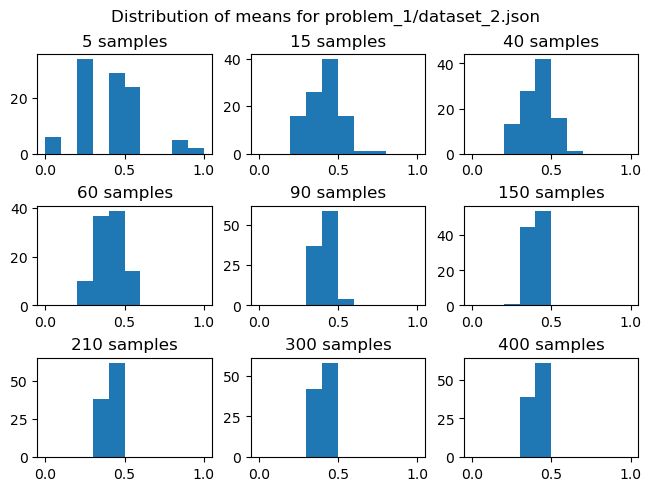

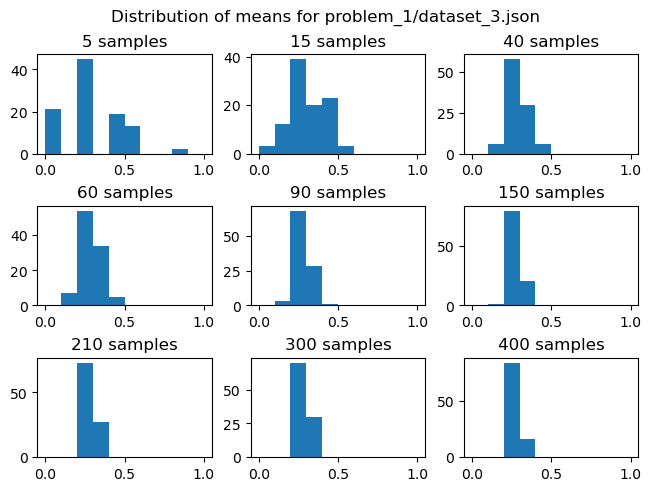

'--------------------Write your code above this line------------------------------'

In [5]:
'''--------------------Write your code below this line------------------------------'''
# Use the dataset files,
# Read into numpy array of numpy arrays instead.
my_data_files = [
    'problem_1/dataset_1.json',
    'problem_1/dataset_2.json',
    'problem_1/dataset_3.json',
]

subsample_sizes = [5, 15, 40, 60, 90, 150, 210, 300, 400]
repititions     = 100

# We will turn this off (set to False) for the real runs.
show_debug_stuff = False

# Create an array to hold each data array (one array to rule them all...)
toss_data  = np.array([None]*3)


# Create 3D arrays to hold the computed resample means and variances.
toss_means = np.zeros((len(my_data_files), len(subsample_sizes), repititions))
toss_vars  = np.zeros((len(my_data_files), len(subsample_sizes), repititions))

# Now work
row = 0
for json_file_path in my_data_files:

    print(f"Reading file {json_file_path}")
    
    # Read the boolean data from the JSON file into a Python list
    with open(json_file_path, 'r') as json_file:
#       tmp_array = np.empty((1,))
        tmp_array = np.array(json.load(json_file))

    N = len(tmp_array)  # How many samples?
    print(f"\tRead {N} samples")

    toss_data[row] = tmp_array

    row += 1
    
print(f"Final data collection shape: {np.shape(toss_data)}\n")


# Run <repitition> repeats of the subsampling / bootstrapping process on each of these data sets

# Loop over the data sets:
for row in range(len(my_data_files)):

    data_row = toss_data[row]
    print(f"Processing file {my_data_files[row]}:")

    # Loop over subsample sizes:
    for i in range(len(subsample_sizes)):
        sample_size = subsample_sizes[i]

        # Loop over repititions:
        for j in range(repititions):
            
            # Use Numpy's built in random sampler to grab some of the data
            # Use replace=True since Bootstrapping uses random sampling with replacement
            my_random_sample = np.random.choice(data_row, sample_size, replace=True)

            # Now do the calculations
            # 1. Find expectation value (which I THINK is the mean in this case!)
            sample_mean = np.average(my_random_sample)
            # 2. Find variance (which I THINK is standard deviation in this case!)
            sample_var = np.std(my_random_sample)


            # Temporary print to see if the loops and sampling are working as expected
            if show_debug_stuff:
                print(f"Row: {row} Rep: {j} Mean: {sample_mean} Var: {sample_var}")
                print("Sample {i} ({sample_size}):")
                display(my_random_sample)

            # Store these values
            toss_means[row][i][j] = sample_mean
            toss_vars[row][i][j]  = sample_var

        # Temporary print to space things out for readability
        if show_debug_stuff:
            print()
    print(f"\t{repititions} repititions of {len(subsample_sizes)} subsamples complete.")

if show_debug_stuff:
    display(toss_means)

print("\n\n")


# Set up our plots
for row in range(len(my_data_files)):
    fig, axs = plt.subplots(3, 3, layout='constrained')

    fig.suptitle(f"Distribution of means for {my_data_files[row]}")
    
    for i in range(3):
        for j in range(3):
            axs[i][j].hist(toss_means[row][3*i + j], range=(0, 1))
            axs[i][j].set_title(f'{subsample_sizes[3*i + j]} samples')

    plt.show()
'''--------------------Write your code above this line------------------------------'''

## F) 
Plot the expectation values and variances of the above in comparison with the one you have calculated in **C)**. Are there any difference? and is that what you expected? why? 

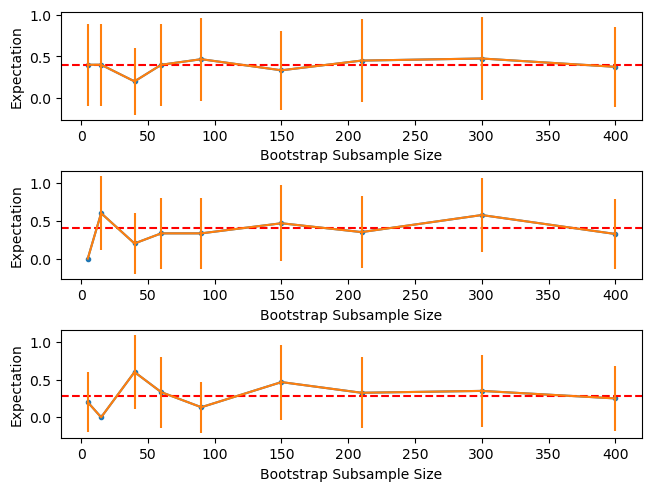

'--------------------Write your code above this line------------------------------'

In [22]:


'''--------------------Write your code below this line------------------------------'''
p_max_analytical = np.array([0.392, 0.406, 0.284])

fig, axs = plt.subplots(3, 1, layout='constrained')
for row in range(len(my_data_files)):

    # fig.suptitle(f"Distribution of means for {my_data_files[row]}")
    
    #y_vals = np.zeros((len(my_data_files), len(subsample_sizes)))
    a_vals = np.array([p_max_analytical[row]]*len(subsample_sizes))
    p_vals = np.zeros((len(my_data_files), len(subsample_sizes)))
    p_vars = np.zeros((len(my_data_files), len(subsample_sizes)))
    
    for i in range(3):
        for j in range(3):
            p_vals[row][3*i + j] = toss_means[row][i][j]
            p_vars[row][3*i + j] = toss_vars[row][i][j]
            # axs[i][j].set_title(f'{subsample_sizes[3*i + j]} samples')

    axs[row].plot(subsample_sizes, p_vals[row], marker=".", label="Bootstrap Data")
    axs[row].axhline(y=p_max_analytical[row], color='r', linestyle='dashed', label="Analytical Calculations")    
    axs[row].errorbar(subsample_sizes, p_vals[row], yerr=p_vars[row], label="Bootstrap Errors")
    axs[row].set_xlabel("Bootstrap Subsample Size")
    axs[row].set_ylabel("Expectation")
    # axs[row].legend()
plt.show()

'''--------------------Write your code above this line------------------------------'''


These variances look different, I'm not sure these are correct...

<div style="text-align: center;">
    <h2><strong> Particle Decay </strong></h2>
</div>

Unstable particles are emitted from a source and undergo decay at a distance $x$, a continuous real number following an exponential probability distribution with a characteristic length $\lambda$. Decay events can be detected only if they happen within a range extending from $x = 1$ to $x = \infty$, (a.u.). A total of $N$ decay events are observed at positions {$x_1$, ... , $x_N$}.
<br>

<div style="text-align: center;">
    <h3><strong> Decay Process: Probability density function  </strong></h3>
</div>
<br>
For a given decay parameter, $\lambda$, the probability of observing a particle at a distance $x$ is given by an exponential function, <br>
​
\begin{equation}
P(x\ |\ \lambda) = \frac{1}{ Z(\lambda)} \frac{1}{\lambda}e^{-x/\lambda}\ \ \ \ \ \ 0 < x < \infty
\end{equation}
​
where
$$ Z(\lambda) = \int_0^\infty dx \frac{1}{\lambda}e^{-x/\lambda} = e^{-1/\lambda} . $$

## A)
Define a particle class that takes a single input, named decay constant. Write the probability density function (given a fixed $\lambda$) showing above as a method ('pdf_decay') of the class. 

In [7]:
import numpy as np
import matplotlib.pyplot as plt


'''--------------------Write your code below this line------------------------------'''
## I received tips on using self in class establishment from Elijah while we met with Zihang.

class Particle:
    def __init__(self, decay_constant):
        self.decay_constant = decay_constant

    def pdf_decay(self, x):
        Z = np.exp((-1)/self.decay_constant)
        
        pt1 = 1/Z
        pt2 = 1/self.decay_constant
        pt3 = np.exp(-x/self.decay_constant)
            
        P = pt1*pt2*pt3
        
        return P
    
    def pdf_lam(self, x, lam): # lam replaces self.decay_constant so we can send in a numpy array instead...
        Z = np.exp((-1)/lam)
        
        pt1 = 1/Z
        pt2 = 1/lam
        pt3 = np.exp(-x/lam)
            
        P = pt1*pt2*pt3
        
        return P
    
    def surface_plot(self, x, lam):
        Z = np.exp((-1)/lam)
        
        pt1 = 1/Z
        pt2 = 1/lam
        # pt3 = np.exp(-x/lam)
        
        opp = (-1*x)
        quo = np.divide(opp, lam)
        
        pt3 = np.exp(quo)
            
        P = pt1*pt2*pt3
        
        return P

# Test this out:
decay_c = 2
part = Particle(decay_c)
x_chosen = 1
res = part.pdf_decay(x_chosen)
print(f'The result for a decay constant of 2 and an x of {x_chosen} is {res}')
'''--------------------Write your code above this line------------------------------'''

The result for a decay constant of 2 and an x of 1 is 0.5


'--------------------Write your code above this line------------------------------'

## B)
Define four particles as class objects with decay constants [0.4,1,2,3]. Plot the pdf curves $P(x\ |\ \lambda) $ and label them (in a single plot). (hint: you may want to define different class methods to output the value). 

'--------------------Write your code above this line------------------------------'

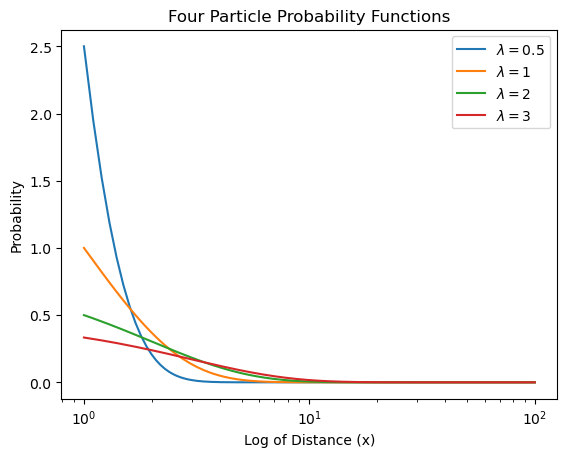

In [8]:
'''--------------------Write your code below this line------------------------------'''

P04 = Particle(0.4)
P1 = Particle(1)
P2 = Particle(2)
P3 = Particle(3)

x = np.linspace(1, 100, 1000)

#
yP04 = P04.pdf_decay(x)

yP1 = P1.pdf_decay(x)

yP2 = P2.pdf_decay(x)

yP3 = P3.pdf_decay(x)

# Display what these arrays are?
if False:
    display(yP04)
    display(yP1)
    display(yP2)
    display(yP3)

plt.semilogx(x, yP04, label="$\lambda = 0.5$")
plt.semilogx(x, yP1, label="$\lambda = 1$")
plt.semilogx(x, yP2, label="$\lambda = 2$")
plt.semilogx(x, yP3, label="$\lambda = 3$")
plt.ylabel('Probability')
plt.xlabel('Log of Distance (x)')
plt.title('Four Particle Probability Functions')
plt.legend()
'''--------------------Write your code above this line------------------------------'''

## C)
Write the probability density function $P(x\ |\ \lambda) $ (given a fixed position $x$) showing above as a **new method** in the particle class. Define four particles as class objects with fixed positions [2,5,7,10]. Plot the pdf curves and label them (in a single plot).

'--------------------Write your code above this line------------------------------'

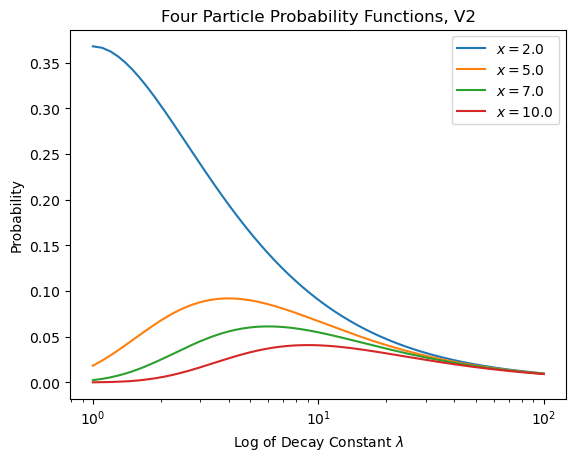

In [9]:
# '''--------------------Write your code below this line------------------------------'''
# Here, the lam will be 1.
P2 = Particle(1.0)
P5 = Particle(1.0)
P7 = Particle(1.0)
P10 = Particle(1.0)

lam = np.linspace(1, 100, 1000)

#
yP2 = P2.pdf_lam(2.0, lam)

yP5 = P5.pdf_lam(5.0, lam)

yP7 = P7.pdf_lam(7.0, lam)

yP10 = P10.pdf_lam(10.0, lam)

# Display what these arrays are?
if False:
    display(yP2)
    display(yP5)
    display(yP7)
    display(yP10)

plt.semilogx(lam, yP2, label="$x = 2.0$")
plt.semilogx(lam, yP5, label="$x = 5.0$")
plt.semilogx(lam, yP7, label="$x = 7.0$")
plt.semilogx(lam, yP10, label="$x = 10.0$")
plt.ylabel('Probability')
plt.xlabel('Log of Decay Constant $\lambda$')
plt.title('Four Particle Probability Functions, V2')
plt.legend()

'''--------------------Write your code above this line------------------------------'''

## D)
Define a **new method** in the particle class that generate a 3D surface Plot $P(x\ |\ \lambda) $ as a function of $x$ and $\lambda$. You should create the surface plot in '.png' format, and output the image to a user provided path.


Please enter a file name: 3dmeshprob2.png
Saving figure to: 3dmeshprob2.png


'--------------------Write your code above this line------------------------------'

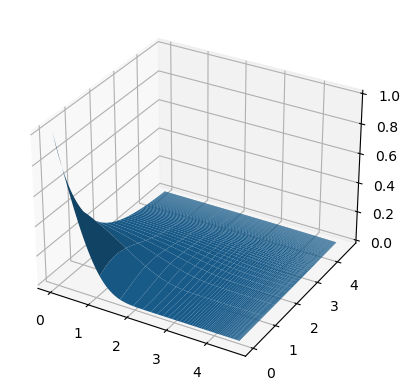

In [10]:
# Import packages for making a 3D plot
from mpl_toolkits.mplot3d import Axes3D


'''--------------------Write your code below this line------------------------------'''

mesh_P1 = Particle(1.0)

xlin = np.arange(1, 101, 0.1)
ylin = np.arange(1, 101, 0.1) # These are my "lambda" values here.

X,Y = np.meshgrid(ylin, xlin)

array2D = mesh_P1.surface_plot(X,Y)


fig, ax1 = plt.subplots(subplot_kw={"projection":"3d"})
surface = ax1.plot_surface(np.log(X), np.log(Y), array2D)

useroutputname = input("Please enter a file name: ")
if not useroutputname.endswith(".png"):
    useroutputname = useroutputname + ".png"
print(f"Saving figure to: {useroutputname}")
fig.savefig(useroutputname, format="png")
'''--------------------Write your code above this line------------------------------'''

<div style="text-align: center;">
    <h3><strong> Unknown Particle Decay </strong></h3>
</div>
<br>
You are given two datasets that record the decay distances of approximately $10^4$ data points in both a vacuum and an optical cavity. In this question, you are asked to infer the values of the decay constants, $\lambda$, under both conditions. The measurement files are 'Vacuum_decay_dataset.json' and 'Cavity_decay_dataset.json.' Here are snapshots of the data. 




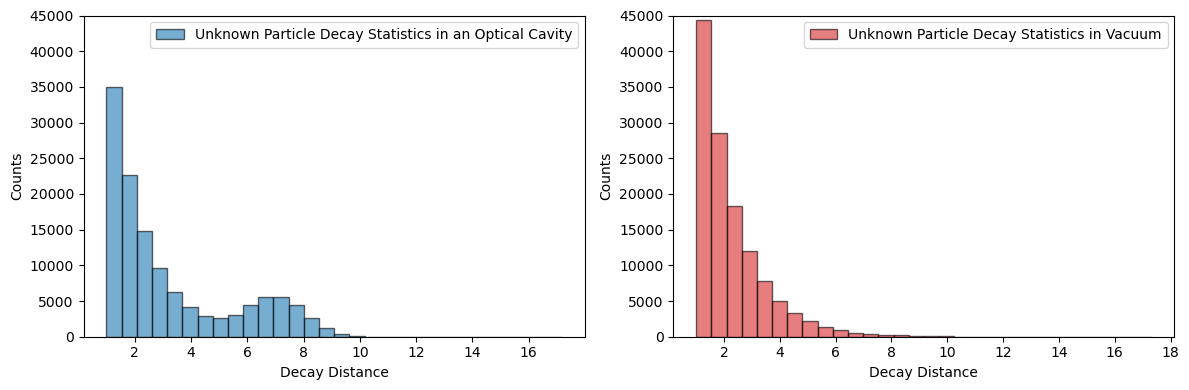

## E)
You can observe that the optical cavity modifies a fraction of particles into a different type with distinct decay properties. What are the decay constants in both cases? How can you define the decay constant in the presence of an optical cavity? What additional structures have you observed? Let's assume the second particle type follows a Gaussian probability distribution function:
$$\mathcal{F}(x\ |\ \mu, \sigma)= \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}. $$
For simplicity, you can consider that the observed decay counts in an optical cavity are proportional to:
$\sim \mathcal{F}(x\ |\ \mu, \sigma) +P(x\ |\ \lambda) $. What are the parameters $\mu, \sigma, \lambda$ that best fit the data? Please provide your explanations and any relevant code.

#### How can I think about the constructions of decays?

<p>Well, the red one looks like an exponential decay. Could maybe do a least-squares fit to the log of the data. Polynomial order 1, gives a line, will give the slope that will be the decay constant? 1/decay constant? P function only</p>

<p>The blue looks like an exponential decay except for the "hump," which looks like a Gaussian bell curve centered at 7. F function + the P function.</p>

1. Plot and find where the exp ends
2. Fit to that data
3. Fit to Gaussian where the bell curve starts

<p>Start by declaring the functions as described above so we can fit to them...</p>

In [11]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt


'''--------------------Write your code below this line------------------------------'''
def P_x_lambda(x, lam):
    c = 16000 /lam
    exponent = (1-x)/(lam)
    exp_fac = np.exp(exponent)
    P = c*exp_fac
    return P

# Providing a constant we can reuse:
sqrt_2_pi = np.sqrt(np.pi*2.0)

# Continuing to define the other functions...
def F_x_mu_sigma(x, mu, sig):
    c = 3600/(sig*sqrt_2_pi)
    exponent = (-1.0)*((x-mu)**2/(2.0*sig**2))
    F = c*np.exp(exponent)
    return F

def K_x_mu_sigma_lambda(x, mu, sig, lam):
    K = P_x_lambda(x, lam) + F_x_mu_sigma(x, mu, sig)
    return K

Processing file problem_2/Cavity_decay_dataset.json
	Min: 1.0000110536631197, Max: 17.177396402911192
Processing file problem_2/Vacuum_decay_dataset.json
	Min: 1.0000038478178426, Max: 17.325999884636406


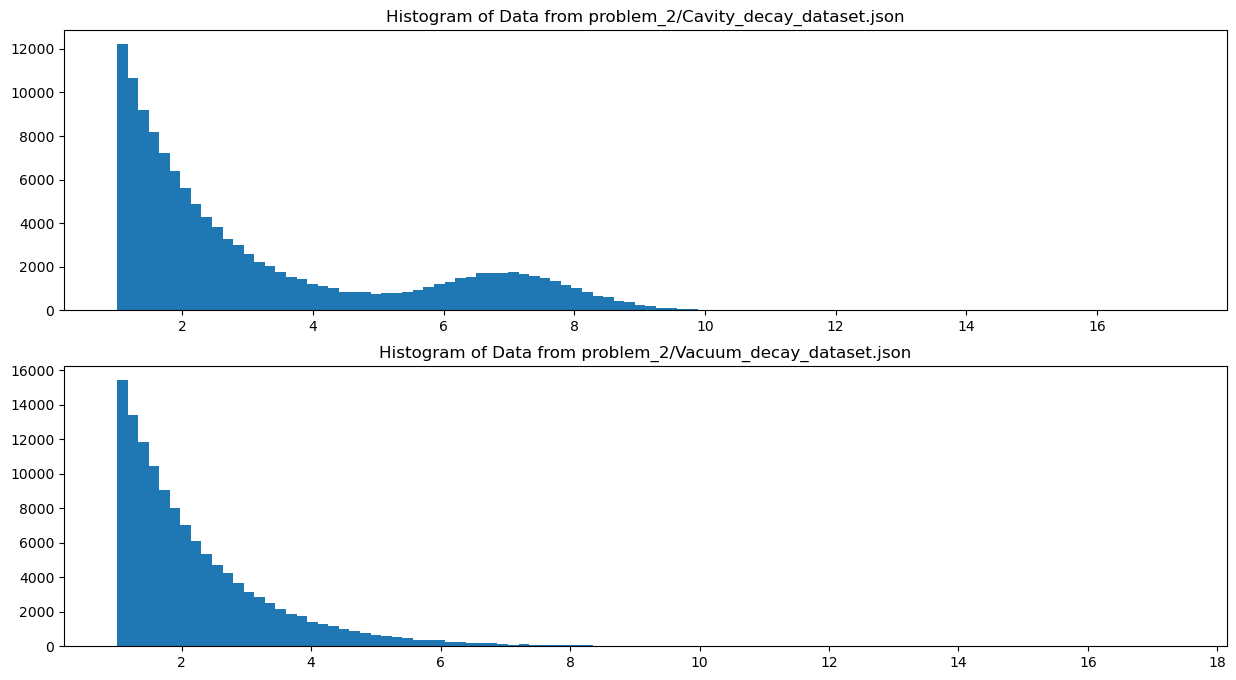

problem_2/Cavity_decay_dataset.json fit parameters (mu, sigma, lambda): [6.9879244  0.91944303 1.22759054]

	function evaluations:	21
	mesg_0:			Both actual and predicted relative reductions in the sum of squares
  are at most 0.000000
	ier_0:			1
				RESULT: scipy FOUND a solution.

problem_2/Vacuum_decay_dataset.json fit parameters (lambda): [0.98393146]

	function evaluations:	9
	mesg_1:			Both actual and predicted relative reductions in the sum of squares
  are at most 0.000000
	ier_1:			1
				RESULT: scipy FOUND a solution.



'--------------------Write your code above this line------------------------------'

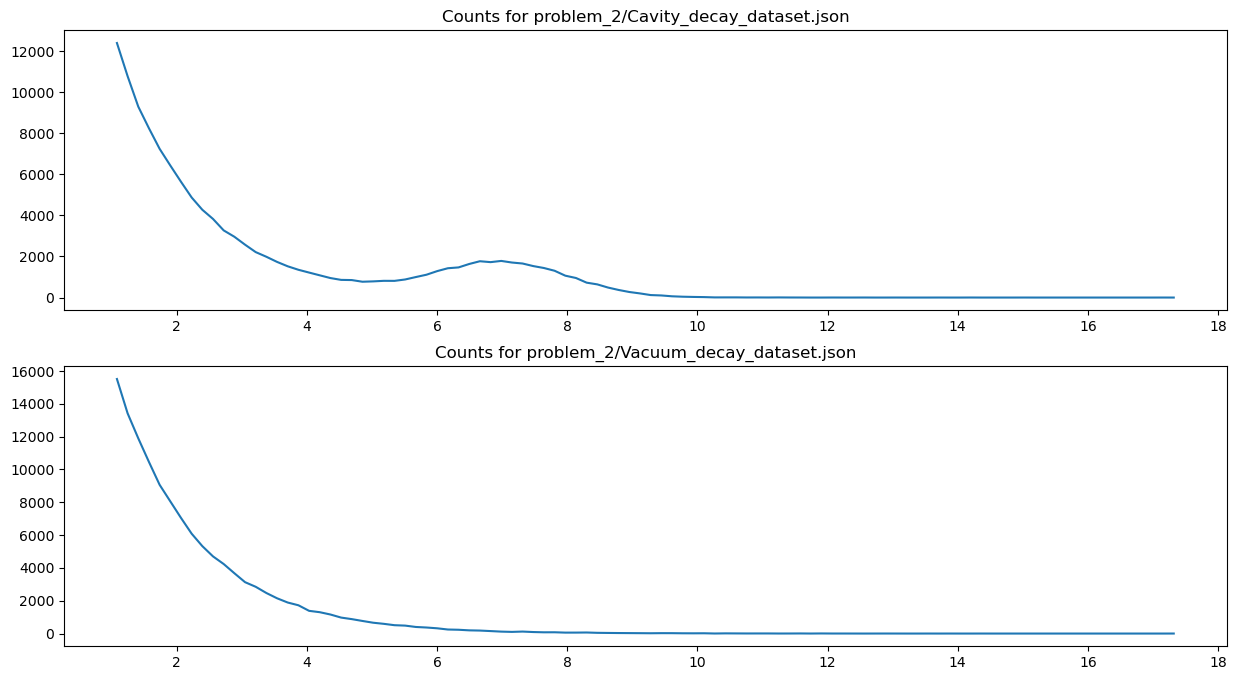

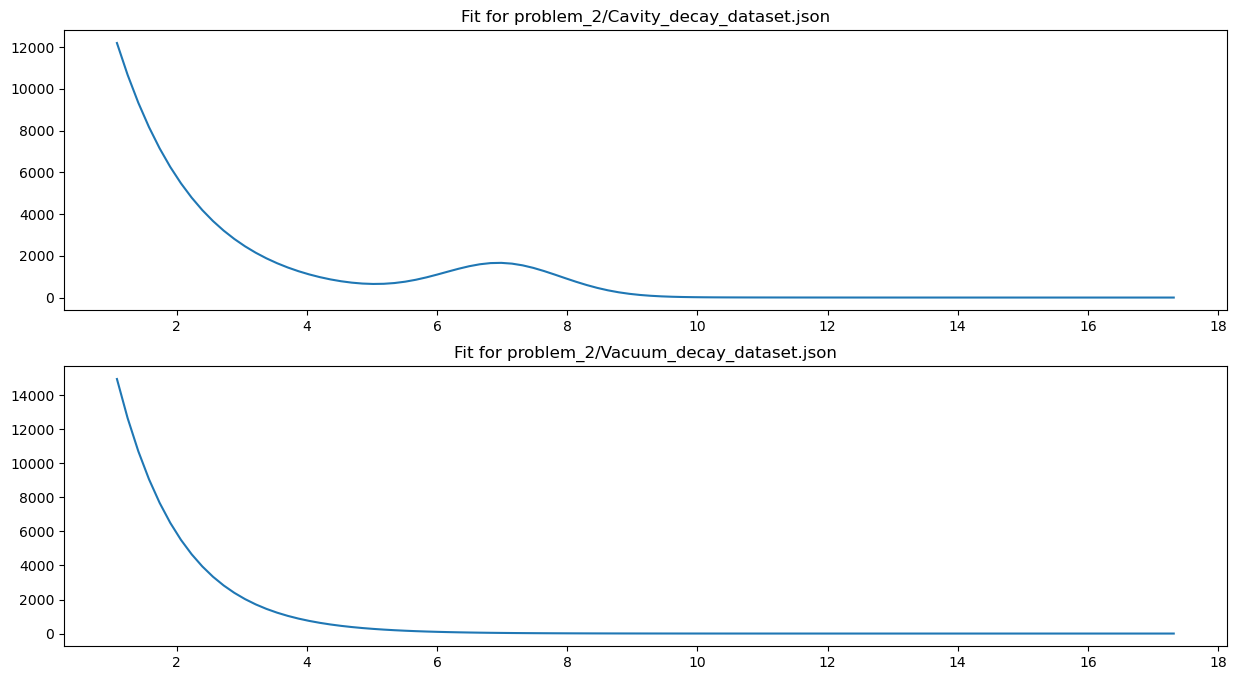

In [12]:
# Loop across those files for efficiency:
my_particle_files = [
    'problem_2/Cavity_decay_dataset.json',
    'problem_2/Vacuum_decay_dataset.json',
]

# Set up the basis of the future figure:
n_rows_part = len(my_particle_files)
n_cols_part = 1
row         = 0
n_bins      = 100

# Find the # decays as function of distance to effectively re-plot the histograms, then use scipy
# to fit curves to them.

distances = np.array([None]*n_rows_part)

fig, axs = plt.subplots(n_rows_part, n_cols, figsize=(15, 8))

for json_file_path in my_particle_files:

    print(f"Processing file {json_file_path}")
    
    # Read boolean JSON file into Python list
    with open(json_file_path, 'r') as json_file:
        dist_data = json.load(json_file)
        distances[row] = np.array(dist_data)
        
    min_dist = np.min(distances[row])
    max_dist = np.max(distances[row])
    
    print(f'\tMin: {min_dist}, Max: {max_dist}')
    
    axs[row].hist(distances[row], bins=n_bins)
    axs[row].set_title(f'Histogram of Data from {json_file_path}')
    
    row += 1
    
plt.show()

# Min and max are roughly 1.0 and 17.4.

use_min_d = 1.0
use_max_d = 17.4

# Find width of distance ranges
delta_d = (use_max_d - use_min_d) / n_bins
delta_d_2 = delta_d / 2.0

# Count # data points in each bin:
decay_count = np.array([None]*n_rows_part)
left_edges = np.linspace(use_min_d, use_max_d-delta_d, n_bins)

fig2, ax2 = plt.subplots(n_rows_part, n_cols_part, figsize=(15, 8))

for row in range(n_rows_part):
    counts = np.array([0]*n_bins)
    for i in range(n_bins):
        d = distances[row]
        counts[i] = len(d[(d >= left_edges[i]) & (d < left_edges[i] + delta_d)])

    ax2[row].plot(left_edges+delta_d_2, counts)
    ax2[row].set_title(f"Counts for {my_particle_files[row]}")
    decay_count[row] = counts


# An attempt at fitting curves...

# Calculate the x values once, so they're reuseable:
x_values  = left_edges + delta_d_2

row_0_params, r_0_pcov, info_dict_0, mesg_0, ier_0 = sp.optimize.curve_fit(K_x_mu_sigma_lambda,
                                                                           x_values,
                                                                           decay_count[0],
                                                                           p0=[7.0, 1.0, 1.0],
                                                                           full_output=True)
print(f"{my_particle_files[0]} fit parameters (mu, sigma, lambda): {row_0_params}\n")
print(f"\tfunction evaluations:\t{info_dict_0['nfev']}")
print(f"\tmesg_0:\t\t\t{mesg_0}")
print(f"\tier_0:\t\t\t{ier_0}")
if ier_0 in [1, 2, 3, 4]:
    print(f"\t\t\t\tRESULT: scipy FOUND a solution.")
else:
    print(f"\t\t\t\tRESULT: scipy DID NOT FIND a solution.")
print()

row_1_params, r_1_pcov, info_dict_1, mesg_1, ier_1 = sp.optimize.curve_fit(P_x_lambda,
                                                                           x_values,
                                                                           decay_count[1],
                                                                           p0=[1.0],
                                                                           full_output=True)
print(f"{my_particle_files[1]} fit parameters (lambda): {row_1_params}\n")
print(f"\tfunction evaluations:\t{info_dict_1['nfev']}")
print(f"\tmesg_1:\t\t\t{mesg_1}")
print(f"\tier_1:\t\t\t{ier_1}")
if ier_1 in [1, 2, 3, 4]:
    print(f"\t\t\t\tRESULT: scipy FOUND a solution.")
else:
    print(f"\t\t\t\tRESULT: scipy DID NOT FIND a solution.")
print()


# Plot the functions with the curve fit outputs:

fig3, ax3 = plt.subplots(n_rows_part, n_cols_part, figsize=(15, 8))
test_counts_0 = K_x_mu_sigma_lambda(x_values, row_0_params[0], row_0_params[1], row_0_params[2])
test_counts_1 = P_x_lambda(x_values, row_1_params[0])
ax3[0].plot(x_values, test_counts_0)
ax3[0].set_title(f"Fit for {my_particle_files[0]}")
ax3[1].plot(x_values, test_counts_1)
ax3[1].set_title(f"Fit for {my_particle_files[1]}")

'''--------------------Write your code above this line------------------------------'''

In [13]:
print(f'The Cavity data set has Decay Constant lambda = {row_0_params[2]}, as well as mu = {row_0_params[0]} and sigma = {row_0_params[1]}')
print(f'The Vacuum data set has Decay Constant lambda = {row_1_params[0]}. Much simpler!')

The Cavity data set has Decay Constant lambda = 1.227590537623373, as well as mu = 6.987924402822709 and sigma = 0.9194430309061372
The Vacuum data set has Decay Constant lambda = 0.9839314552133739. Much simpler!


<div style="text-align: center;">
    <h2><strong> Moment Generating Function (MGF)  </strong></h2>
</div>

The MGF of a random variable $x$ is denoted as $M(t)$, where $t$ is a real number. It is defined as:
$$M(t|\ \lambda) \sim \int dx e^{t x} P(x\ |\ \lambda). $$ It generates moments by differentiation:
$$\frac{\partial}{\partial t} M(t|\ \lambda)\big|_{t=0} \sim \int dx \big( x P(x\ |\ \lambda) \big) $$
The key idea is to take successive derivatives of the MGF with respect to the parameter $t$ and evaluate them at $t = 0$. Each derivative, when evaluated at $t = 0$, corresponds to a specific moment of the random variable. The process is systematic, and it allows you to calculate moments of different orders (mean, variance, skewness, kurtosis, etc.) in a structured way.



<div style="text-align: center;">
    <h3><strong> MGF of the decay process  </strong></h3>
</div>

Let's recal the probability density function in **Problem 2**,
$$P(x\ |\ \lambda) = \frac{1}{ Z(\lambda)} \frac{1}{\lambda}e^{-x/\lambda}\ \ \ \ \ \ 0 < x < \infty
$$
where
$$ Z(\lambda) = \int_0^\infty dx \frac{1}{\lambda}e^{-x/\lambda} = e^{-1/\lambda} . $$



## A) 
What is the MGF for the above probability density function? Calculate the above condition **analytically**,
<br> 
''**write you answer below**''
<br><br> **Steps:** <br>
$$M(t | \lambda) \approx \int dx e^{tx} P(x | \lambda)$$
$$\frac{\partial}{\partial t} M(t|\lambda)\vert_{t=0} \approx \int dx(xP(x|\lambda))$$
<center>Where P = the probability density function...</center>
$$P(x|\lambda) = \frac{1}{Z(\lambda)}\frac{1}{\lambda}e^{-x/\lambda}$$
$$Z(\lambda) = e^{-1/\lambda}$$

$$P(x|\lambda) = \frac{1}{e^{-1/\lambda}}\frac{1}{\lambda}e^{-x/\lambda}$$
$$= e^{1/\lambda}\frac{1}{\lambda}e^{-x/\lambda}$$
$$= \frac{1}{\lambda}e^{(1-x)/\lambda}$$
<center>Combining the two yields:</center>
$$M(t | \lambda) \approx \int dx e^{tx} (\frac{1}{\lambda}e^{(1-x)/\lambda})$$
<br>
'' **write you answer above**''
<br> <br> 

## B) 
Using the above result, calculate the mean and variance **analytically**,
<br> 
''**write you answer below**''
<br><br> **Steps:** <br>
<br>
Mean: first partial wrt t
$$\frac{\partial}{\partial t} M(t|\lambda)\vert_{t=0} \approx \int dx(x\frac{1}{\lambda}e^{(1-x)/\lambda})$$
$$\frac{1}{\lambda} \int dx x e^{(1-x)/\lambda}$$
<br>
This is of the form $\int x e^{cx} dx = e^{cx}(\frac{cx-1}{c^2})$
Let $u = 1-x$, $x = 1-u$, $du=-dx$

$$\frac{1}{\lambda} \int dx x e^{(1-x)/\lambda} = \frac{1}{\lambda}\int(1-u)e^{\frac{u}{\lambda}}(-du)$$
$$-\frac{1}{\lambda}\int e^{u/\lambda}du + \frac{1}{\lambda}\int u e^{u/\lambda}du$$
(lots of algebra I did on paper....)
$$-e^{(1-x)/\lambda}[x+\lambda]$$


Variance: second partial wrt t
$$\frac{\partial^2}{\partial t^2}M(t|\lambda) = \frac{\partial}{\partial t} \frac{1}{\lambda}\int dx e^{tx}xe^{(1-x)/\lambda}$$
$$\frac{\partial^2}{\partial t^2}M(t|\lambda) = \frac{\partial}{\partial t} \frac{1}{\lambda}\int dx e^{tx}xe^{(1-x)/\lambda}$$
$$\frac{\partial^2}{\partial t^2}M(t|\lambda) = \frac{1}{\lambda}\int dx e^{tx}x^2e^{(1-x)/\lambda}$$
This is of the form $\int x^2 e^{cx} dx = e^{cx}(\frac{x^2}{c} - \frac{2x}{c^2} + \frac{2}{c^3})$
Let $u = 1-x$, $x = 1-u$, $du=-dx$ (Same as before!)
<br>

$$\frac{1}{\lambda}\int dx e^{tx}x^2e^{(1-x)/\lambda} = \frac{1}{\lambda}\int (-du)(1-u)^2e^{u/\lambda}$$
(lots of algebra that I did on paper using $(1-u)^2 = 1-2u+u^2$ and $u^2 = (1-x)^2 = 1-2x+x^2$)
$$ = -e^{u/\lambda} + 2e^{u/\lambda}(u-\lambda) - e^{u/\lambda}(u^2 - 2\lambda u + 2\lambda^2)$$
<br>
'' **write you answer above**''
<br> <br> 

## C) 
**Numerically** evaluate (finite differences) the first-order derivative and the second-order derivative that yield the mean and variance at various $\lambda$ values. Plot the analytical functions against the numerical results. 

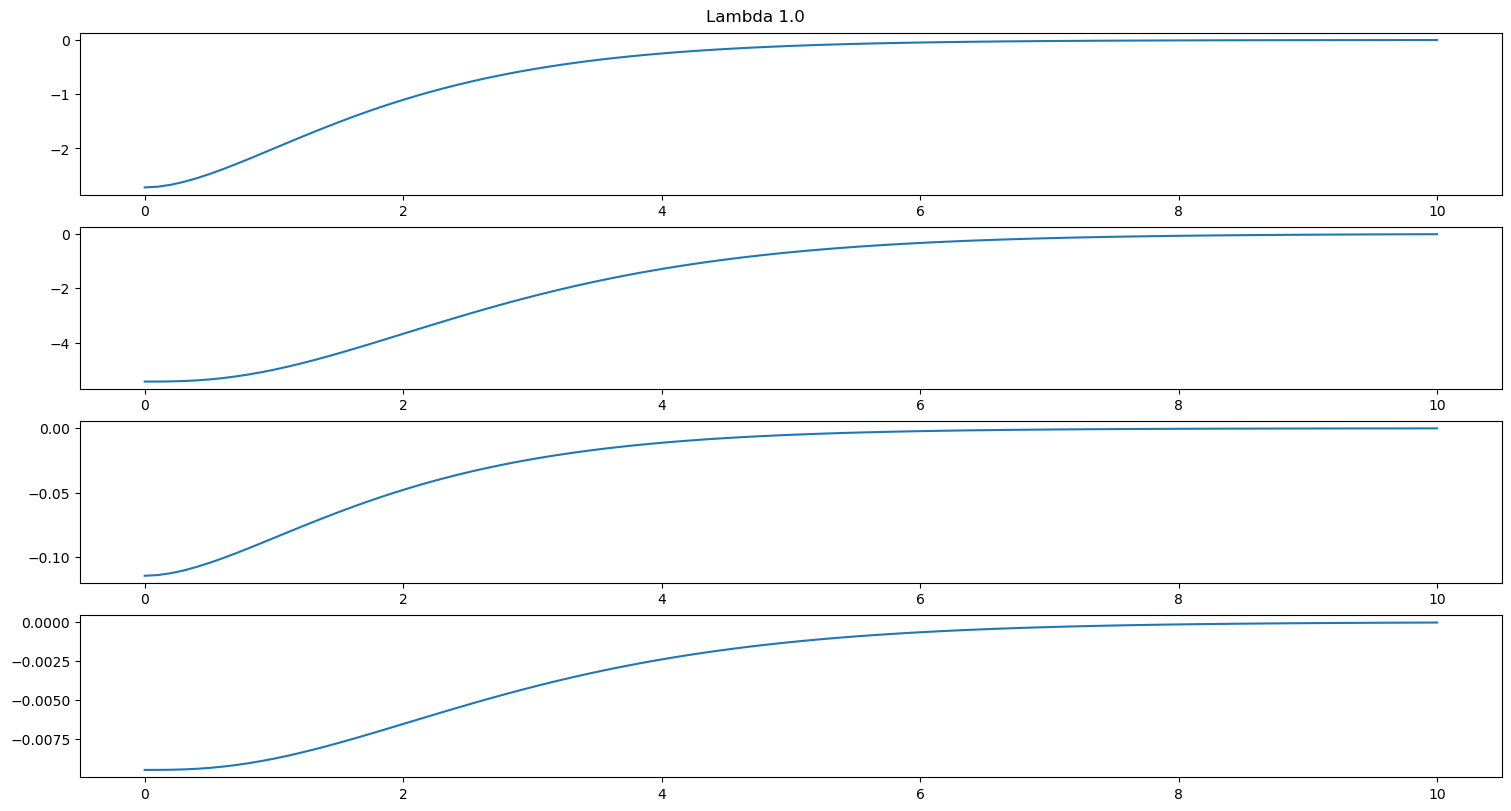

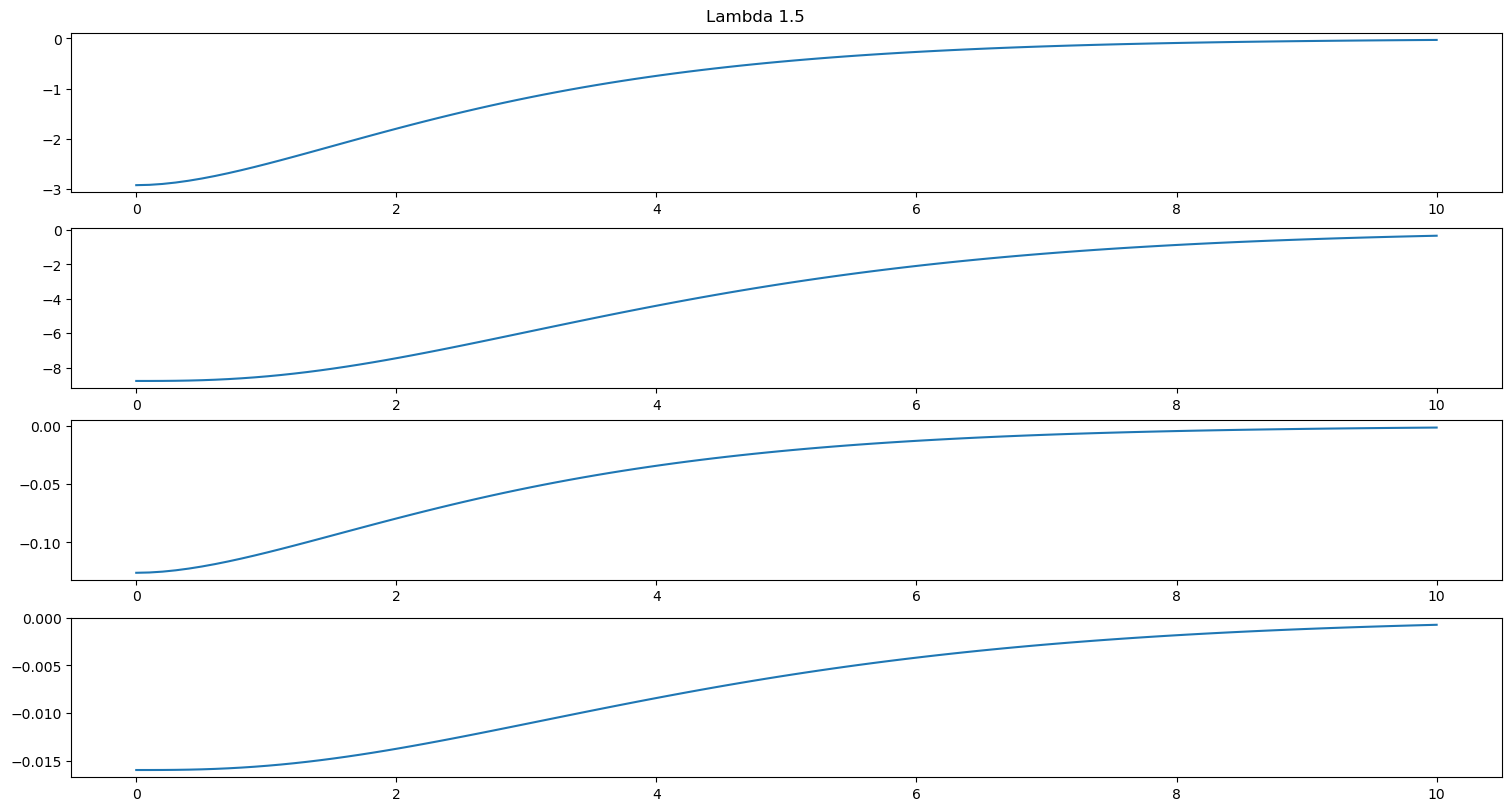

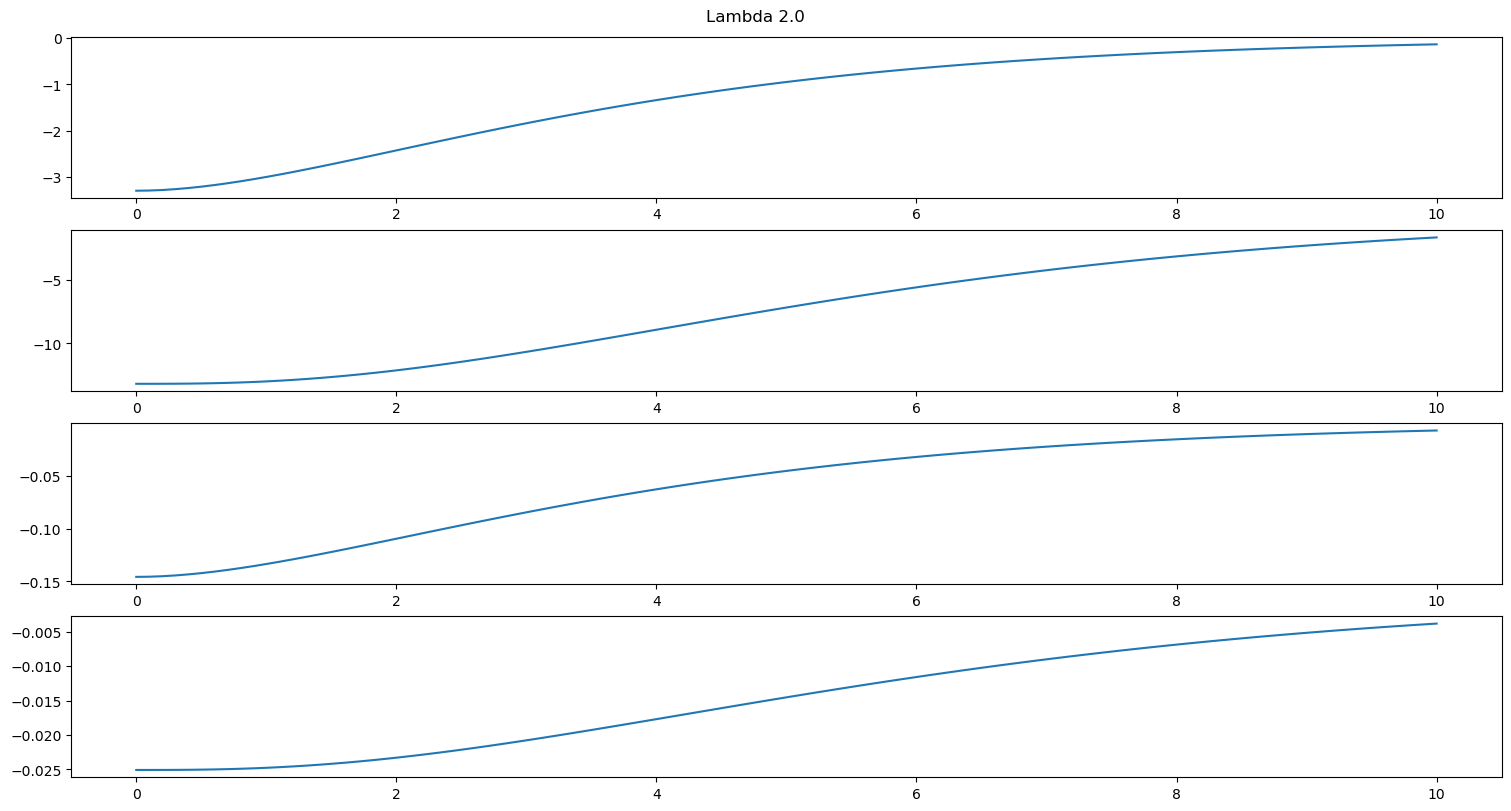

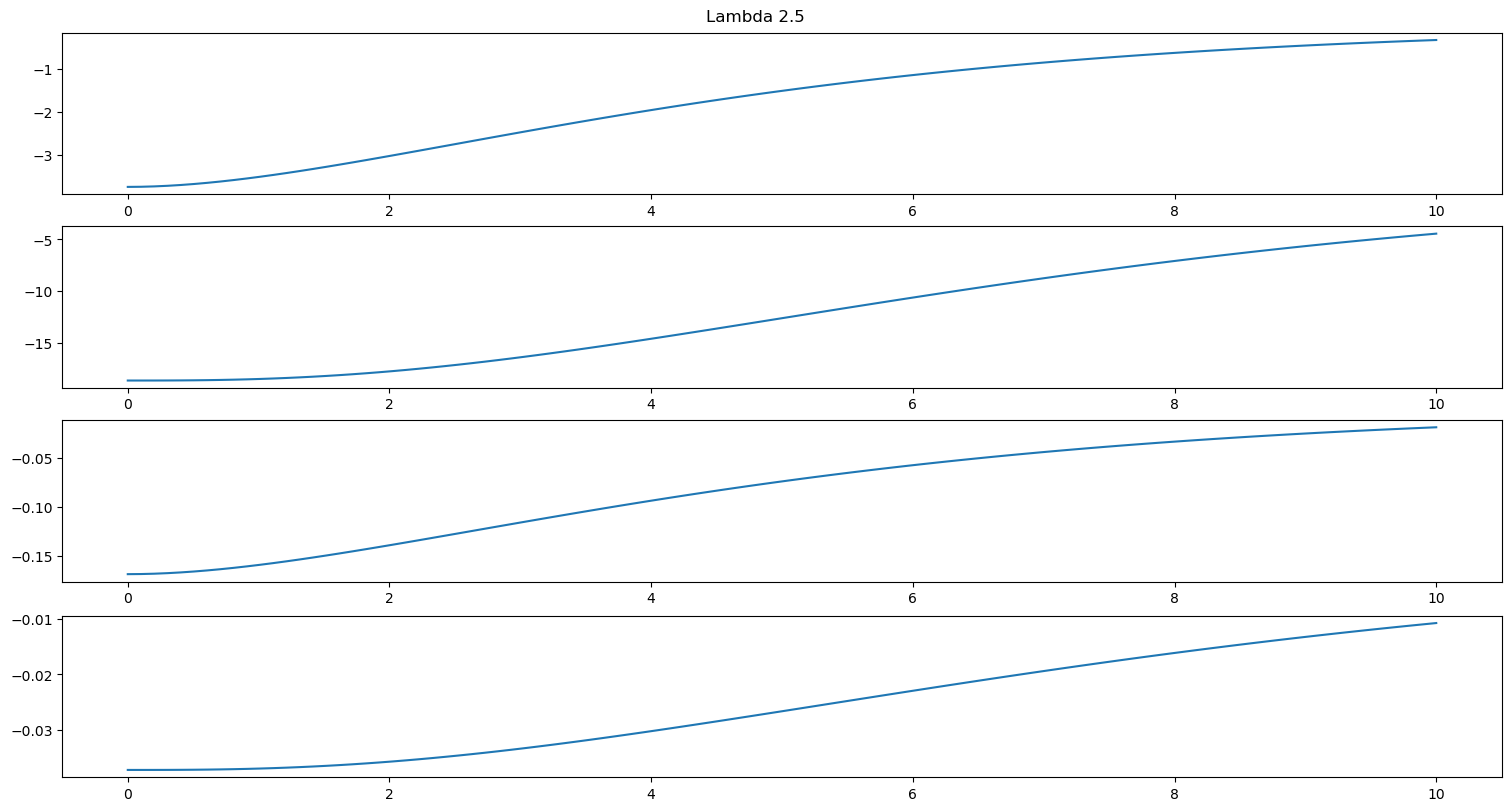

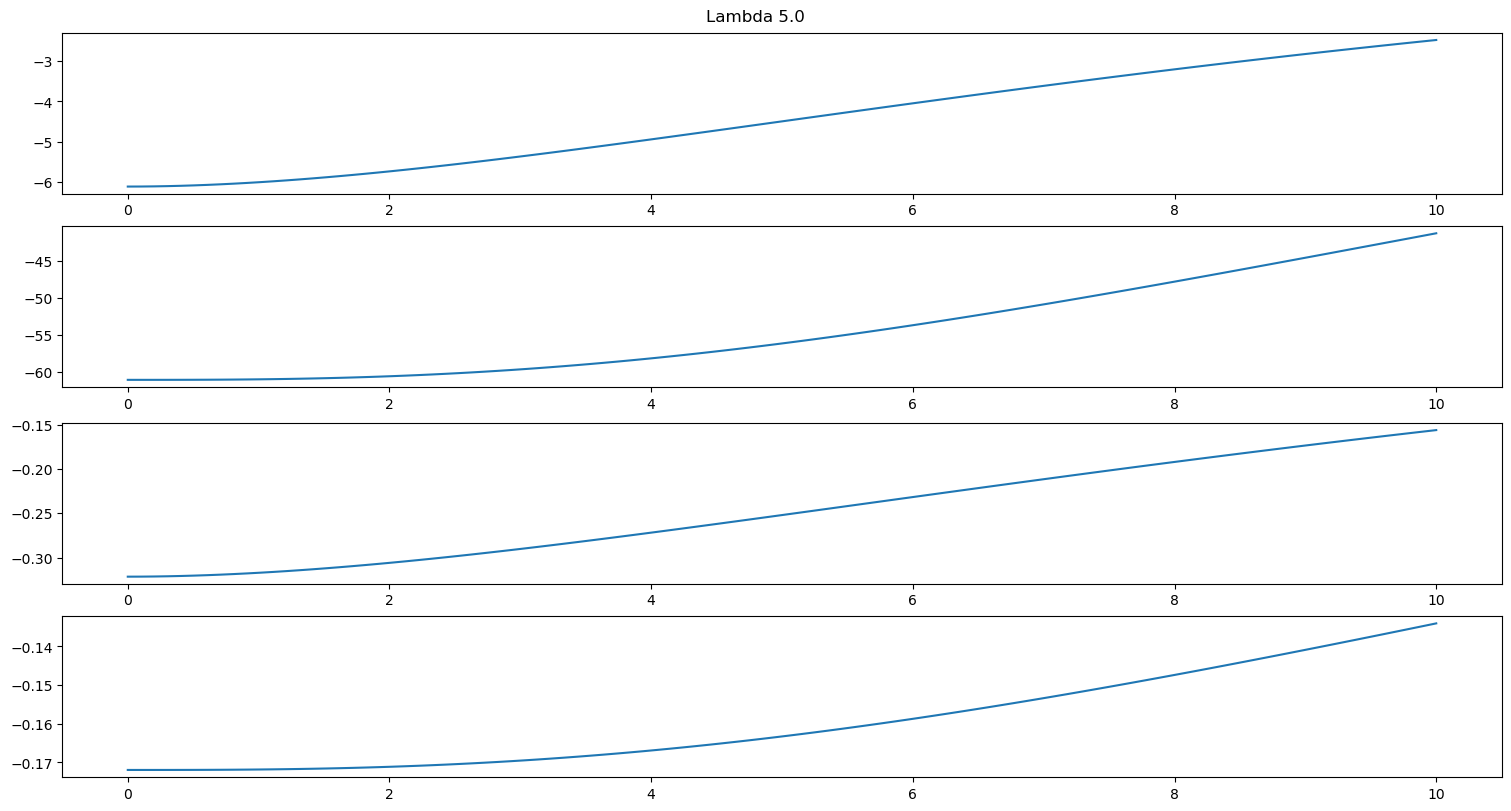

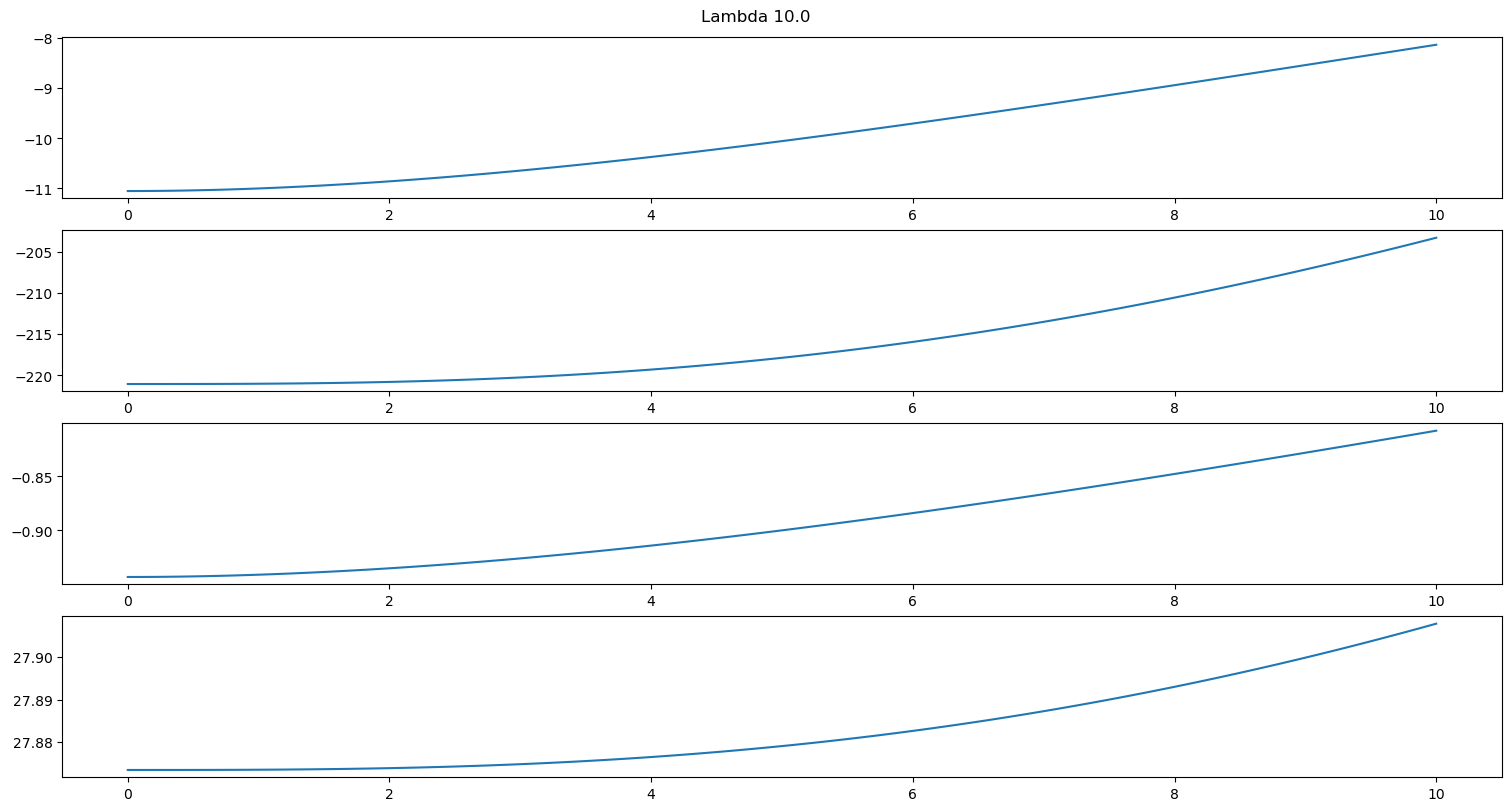

'--------------------Write your code above this line------------------------------'

In [14]:


'''--------------------Write your code below this line------------------------------'''
# First define the base MGF
def MGF(x, lam, t):
    coeff    = (lam * np.exp(1.0/lam)) / ((lam * t -1) * lam)
    exponent = x * (lam * t - 1.0)/lam 
    exp_fac  = np.exp(exponent)

    v        = coeff * exp_fac
    return v


# Define the first and second partial derivatives w/r/t t based on the analytical forms
def MGF_mean(x, lam):
    coeff    = (x + lam)
    exponent = (1.0 - x)/lam
    exp_fac  = np.exp(exponent)

    v        = -1.0 * coeff * exp_fac
    return v

def MGF_variance(x, lam):
    coeff    = ((x + lam)**2 + lam**2)
    exponent = (1.0 - x)/lam
    exp_fac  = np.exp(exponent)

    v        = -1.0 * coeff * exp_fac
    return v


n_x_vals = 100
n_t_vals = 100
lam_vals = [1.0, 1.5, 2.0, 2.5, 5.0, 10.0 ]
x_vals   = np.linspace(0.0, 10, n_x_vals)
t_vals   = np.linspace(-2.0, 2.0, n_t_vals)
X, T     = np.meshgrid(x_vals, t_vals)

# Loop over lambdas
for lam in lam_vals:
    
    # Compute first and second derivatives (moments) using analytical functions
    first_deriv_analytical  = MGF_mean(x_vals,lam)
    second_deriv_analytical = MGF_variance(x_vals, lam)

    # Compute a 2D array of MGF values, one axis is x, and one is t.
    mgf_2D       = MGF(X, lam, T)
    
    # Take derivative numerically along t axis
    first_derivative_numerical_2D  = np.gradient(mgf_2D, axis = 0)
    
    # Take derivative numerically along t axis
    second_derivative_numerical_2D = np.gradient(first_derivative_numerical_2D, axis = 0)
    
    # Now find the spot in the middle of the t vals, where t = 0
    # This will give us an array of derivative values as a function of x
    # so we can compare the results to the analytical output
    first_derivative_numerical     = first_derivative_numerical_2D[int(n_t_vals/2), :]
    second_derivative_numerical    = second_derivative_numerical_2D[int(n_t_vals/2), :]
    
    fig, axs = plt.subplots(4, 1, figsize=(15, 8), layout='constrained')
    axs[0].plot(x_vals, first_deriv_analytical)
    axs[1].plot(x_vals, second_deriv_analytical)
    axs[2].plot(x_vals, first_derivative_numerical)
    axs[3].plot(x_vals, second_derivative_numerical)
    fig.suptitle(f"Lambda {lam}")
    plt.show()
'''--------------------Write your code above this line------------------------------'''

<div style="text-align: center;">
    <h3><strong> MGF of a biased coin  </strong></h3>
</div>

Let's recal the likelihood function (probability mass function) in **Problem 1** ,
<br>
$$ P(M,N|p) = \binom{N}{M} p^{M} (1-p)^{N-M}. $$
<br>

## D) 
What is the MGF for the above probability mass function? Calculate the above condition **analytically**,
<br> 
''**write you answer below**''
<br><br> **Steps:** <br>
<br>
'' **write you answer above**''
<br> <br> 
Hint, you should consider the sum,  
$$M(t) = \sum_{x=0}^{n} e^{tx} \binom{n}{x} p^x (1-p)^{n-x}$$
and use the fact,
$$(a + b)^n = \sum_{k=0}^{n} \binom{n}{k} a^{n-k} b^k$$

## E) 
Using the above result, calculate the mean and variance **analytically**,
<br> 
''**write you answer below**''
<br><br> **Steps:** <br>
<br>
'' **write you answer above**''
<br> <br> 

## F) 
**Numerically** evaluate (finite differences) the first-order derivative and the second-order derivative that yield the mean and variance at various $\lambda$ values. Plot the analytical functions against the numerical results. 

In [15]:


'''--------------------Write your code below this line------------------------------'''





'''--------------------Write your code above this line------------------------------'''

'--------------------Write your code above this line------------------------------'